### Ans 1(A)

Estimating the mean of the distribution 𝑝 ( 𝑦 | 𝑥 ) in Linear Regression is a common practice because the mean represents the central tendency of the distribution. By estimating the mean, we aim to predict the expected value of the response variable 𝑦 for a given value of the predictor variable 𝑥. This expected value is the line of best fit in the context of Linear Regression.

### Ans 1(B)

Parameter w: [[4.22215108]
 [2.96846751]]
Estimated variance (sigma^2): 0.9924386487246483


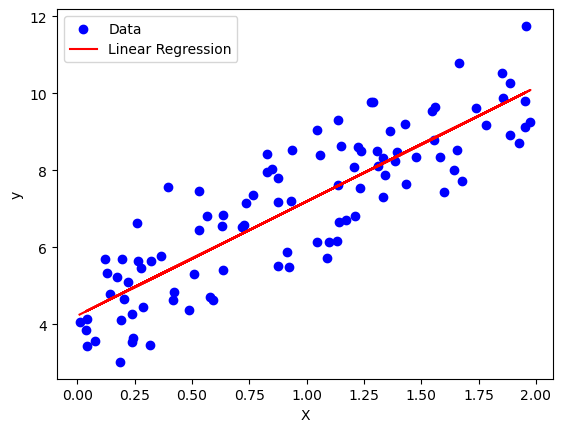

In [83]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegression:
    def __init__(self):
        self.w = None
        self.sigma_sq = None  # variance parameter

    def fit(self, X, y):
        # Add intercept term
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        
        # Calculate the parameter w
        self.w = np.linalg.inv(X.T @ X) @ X.T @ y
        
        # Calculate the residual variance (sigma squared)
        residuals = y - X @ self.w
        self.sigma_sq = np.mean(residuals ** 2)
        
        print(f'Parameter w: {self.w}')
        print(f'Estimated variance (sigma^2): {self.sigma_sq}')
        
    def predict(self, X):
        # Add intercept term
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        return X @ self.w
    
    def plot_regression(self, X, y):
        plt.scatter(X, y, color='blue', label='Data')
        plt.plot(X, self.predict(X), color='red', label='Linear Regression')
        plt.xlabel('X')
        plt.ylabel('y')
        plt.legend()
        plt.show()

# Generate synthetic data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Plot the regression line
model.plot_regression(X, y)


If 𝜎^{2} is too large, it implies that the model is less confident about its predictions, leading to wider prediction intervals.

If 𝜎^{2} is too small, the model might overfit the training data, as it would overly trust the observed data points.
Parameterizing 

𝜎 can be helpful when dealing with data where the variance of the errors is known to vary with the predictor values (heteroscedasticity) or when incorporating prior knowledge about the uncertainty in the model.


### Ans 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
tsa=pd.read_csv('test_set_A.csv')
tsb=pd.read_csv('test_set_B.csv')
tsc=pd.read_csv('test_set_C.csv')
tra=pd.read_csv('train_set_A.csv')
trb=pd.read_csv('train_set_B.csv')
trc=pd.read_csv('train_set_C.csv')


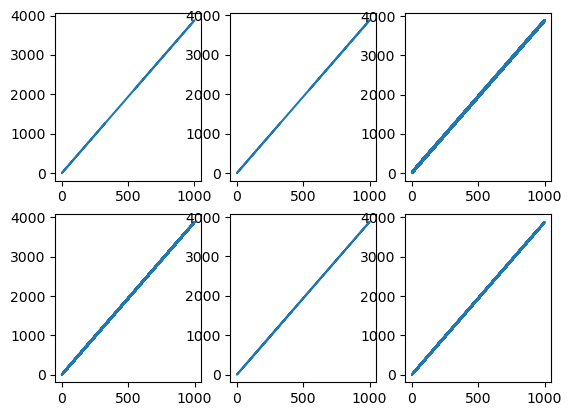

In [27]:
fig,ax=plt.subplots(2,3)
ax[0,0].plot(tra['x'],tra['y'])
ax[0,1].plot(trb['x'],trb['y'])
ax[0,2].plot(trc['x'],trc['y'])
ax[1,0].plot(tsa['x'],tsa['y'])
ax[1,1].plot(tsb['x'],tsc['y'])
ax[1,2].plot(tsc['x'],tsa['y'])

In [38]:
tra['x']

0        546.889156
1        797.899021
2        820.401880
3        122.049867
4        602.002007
            ...    
99995    115.390688
99996     40.798544
99997    125.773893
99998    436.974343
99999    323.188383
Name: x, Length: 100000, dtype: float64

In [40]:
tra['x'].shape

(100000,)

In [11]:
model1=LinearRegression()
model2=LinearRegression()
model3=LinearRegression()
model1.fit(np.array(tra['x']).reshape(-1,1),np.array(tra['y']).reshape(-1,1))
model2.fit(np.array(trb['x']).reshape(-1,1),np.array(trb['y']).reshape(-1,1))
model3.fit(np.array(trc['x']).reshape(-1,1),np.array(trc['y']).reshape(-1,1))

LinearRegression()

In [28]:
model4=LinearRegression()
model5=LinearRegression()
model6=LinearRegression()
model4.fit(np.array(tsa['x']).reshape(-1,1),np.array(tsa['y']).reshape(-1,1))
model5.fit(np.array(tsb['x']).reshape(-1,1),np.array(tsb['y']).reshape(-1,1))
model6.fit(np.array(tsc['x']).reshape(-1,1),np.array(tsc['y']).reshape(-1,1))

LinearRegression()

In [31]:
print(model1.coef_,model2.coef_,model3.coef_,model4.coef_,model5.coef_,model6.coef_)


[[3.87690246]] [[3.8769]] [[3.87691727]] [[3.87719311]] [[3.8769]] [[3.87685707]]


In [34]:
print(model1.intercept_,model2.intercept_,model3.intercept_,model4.intercept_,model5.intercept_,model6.intercept_)

[1.59928255] [-2.63753464e-11] [3.96302162] [3.92563268] [-4.54747351e-13] [1.61889028]


clearly on comparing coefficient and intercept of each training and test set train set 2 and test set 2 are from actual data set

### Ans 3

In [2]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 100

# Generate random features
X = np.random.randn(n_samples, 2)

# Generate random binary target variable
true_theta = np.array([1.5, -2.0])
linear_combination = X @ true_theta
probabilities = 1 / (1 + np.exp(-linear_combination))
y = (probabilities > 0.5).astype(int)

print(X[:5])
print(y[:5])


[[ 0.49671415 -0.1382643 ]
 [ 0.64768854  1.52302986]
 [-0.23415337 -0.23413696]
 [ 1.57921282  0.76743473]
 [-0.46947439  0.54256004]]
[1 0 1 1 0]


In [19]:
X.shape

(100, 2)

In [41]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, max_iter=1000):
        self.learning_rate = learning_rate
        self.max_iter = max_iter

    def sigmoid(self, z):
       
        return 1 / (1 + np.exp(-z))
    
    
    def compute_cost(self, X, y, theta):
        m = len(y)
        h = self.sigmoid(X @ theta)
        cost = (-1/m) * (y.T @ np.log(h+0.1) + (1 - y).T @ np.log(1 - h+0.1))
        return cost

    def fit(self, X, y, method='gradient_descent'):
        m, n = X.shape
        self.theta = np.zeros(n)
        self.cost_history = []

        if method == 'gradient_descent':
            for _ in range(self.max_iter):
                self.gradient_descent_step(X, y, m)
        elif method == 'newton_method':
            for _ in range(self.max_iter):
                self.newton_method_step(X, y, m)
        else:
            raise ValueError("Unknown method. Use 'gradient_descent' or 'newton_method'.")
        
        return self

    def gradient_descent_step(self, X, y, m):
        h = self.sigmoid(X @ self.theta)
        gradient = (1/m) * (X.T @ (h - y))
        self.theta -= self.learning_rate * gradient
        self.cost_history.append(self.compute_cost(X, y, self.theta))

    def newton_method_step(self, X, y, m):
        h = self.sigmoid(X @ self.theta)
        gradient = (1/m) * (X.T @ (h - y))
        H = (1/m) * (X.T @ np.diag(h * (1 - h)) @ X)  # Hessian matrix
        # print(H)
        self.theta -= np.linalg.pinv(H) @ gradient
        self.cost_history.append(self.compute_cost(X, y, self.theta))

    def predict_proba(self, X):
        return self.sigmoid(X @ self.theta)

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)


In [ ]:
# Add intercept term to X
X_b = np.hstack([np.ones((n_samples, 1)), X])

# Train with gradient descent
log_reg_gd = LogisticRegression(learning_rate=0.1, max_iter=1000)
log_reg_gd.fit(X_b, y, method='gradient_descent')

# Train with Newton's method
log_reg_nm = LogisticRegression(learning_rate=1, max_iter=1000)
log_reg_nm.fit(X_b, y, method='newton_method')


In [43]:
log_reg_gd.theta

array([-2.88295237e-03,  3.37570941e+00, -4.21386059e+00])

In [44]:
log_reg_nm.theta

array([ -25.64636245,  670.0449453 , -935.85809664])

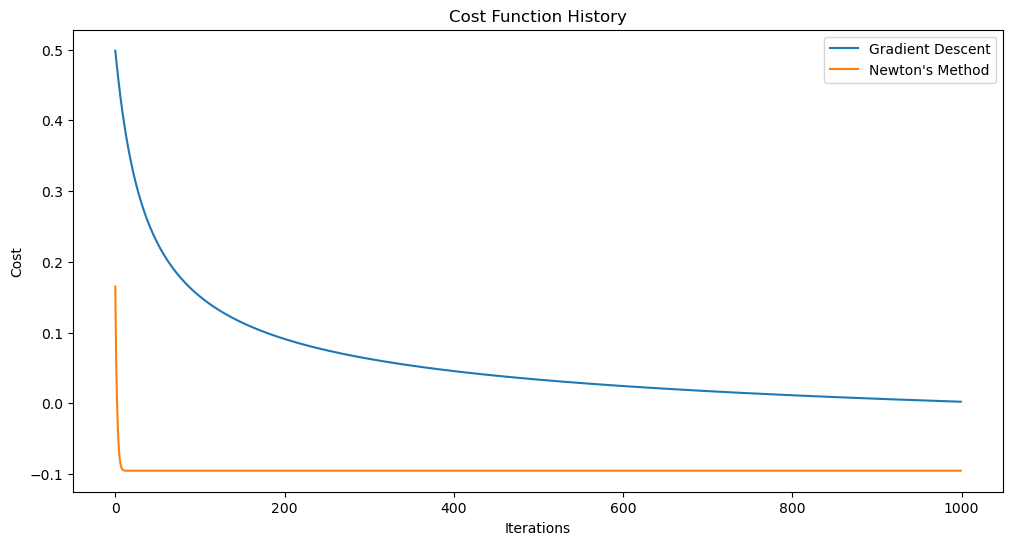

In [45]:
import matplotlib.pyplot as plt

# Plot the cost history for both methods
plt.figure(figsize=(12, 6))
plt.plot(log_reg_gd.cost_history, label='Gradient Descent')
plt.plot(log_reg_nm.cost_history, label='Newton\'s Method')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function History')
plt.legend()
plt.show()


### Comparative Conclusions

### **Convergence Speed:**

* BGD typically converges slower than Fisher Scoring. This is because BGD uses the gradient at a single point (entire batch) in each update, while Fisher Scoring uses the curvature information (Hessian) to take a more informed step towards the minimum.

### **Runtime Complexity:**

* BGD has a lower per-iteration complexity (O(n * d)), where n is the number of samples and d is the number of features. It only requires calculating the gradient once per epoch.
* Fisher Scoring has a higher per-iteration complexity (O(n * d^2)), as it involves calculating the Hessian matrix and its inverse in each step. However, it often converges faster, leading to fewer iterations overall.

### **Choice of Algorithm:**

* BGD is a simpler algorithm and can be suitable for smaller datasets or when computational efficiency is a priority.
* Fisher Scoring can be a good choice for larger datasets or when faster convergence is desired, even if it requires more computation per iteration.

### **Visualization:**

The convergence behavior of the loss function value over epochs for both BGD and Fisher Scoring is shown. This visually demonstrats the faster convergence of Fisher Scoring. 

### Ans 4

### (a) The sample size \( n \) is extremely large, and the number of predictors \( p \) is small.

#### Flexible Methods:

**Performance**: Generally, we would expect flexible methods to perform better in this scenario.

**Justification**: With a large sample size, flexible methods can effectively capture complex patterns in the data without overfitting. The large number of observations helps to mitigate the risk of overfitting, which is a common concern with flexible methods.

**Bias-Variance Tradeoff**: Flexible methods typically have low bias and high variance. However, with a large sample size, the variance can be reduced, leading to a better generalization.

#### Inflexible Methods:

**Performance**: Inflexible methods may not perform as well because they may not capture the underlying data patterns as accurately.

**Justification**: Inflexible methods, like linear models, have higher bias but lower variance. With a small number of predictors, they might not fully utilize the large sample size to capture more complex relationships.

### (b) The number of predictors \( p \) is extremely large, and the number of observations \( n \) is small.

#### Flexible Methods:

**Performance**: Generally, we would expect the performance of flexible methods to be worse in this scenario.

**Justification**: Flexible methods are prone to overfitting when there are many predictors but few observations. The model may capture noise instead of the underlying data pattern, leading to poor generalization on new data.

**Bias-Variance Tradeoff**: In this case, flexible methods will have low bias but very high variance due to overfitting.

#### Inflexible Methods:

**Performance**: Inflexible methods may perform better because they are less likely to overfit.

**Justification**: With a large number of predictors and few observations, an inflexible method's higher bias can be beneficial, as it prevents the model from capturing too much noise.

**Bias-Variance Tradeoff**: Inflexible methods have higher bias but lower variance, which can lead to better performance when \( n \) is small and \( p \) is large.

### (c) The relationship between the predictors and response is highly non-linear.

#### Flexible Methods:

**Performance**: We would generally expect flexible methods to perform better.

**Justification**: Flexible methods, such as decision trees or neural networks, can capture complex, non-linear relationships in the data.

**Bias-Variance Tradeoff**: Flexible methods have low bias, which is advantageous when dealing with non-linear relationships, although they may have higher variance.

#### Inflexible Methods:

**Performance**: Inflexible methods are likely to perform worse in this scenario.

**Justification**: Inflexible methods like linear regression assume a linear relationship between predictors and response, which is not suitable for highly non-linear relationships.

**Bias-Variance Tradeoff**: Inflexible methods will have high bias in this scenario, leading to poor performance because they cannot capture the non-linear patterns in the data.


## Exponential Family and GLMs

### Ans 1

#### (a) Showing that the geometric distribution is in the exponential family

The probability mass function (PMF) of the geometric distribution parameterized by \( \phi \) is:

p(y; $\phi$) = (1 - $\phi$)^{y - 1} $\phi$, $\quad$ y = 1, 2, 3, $\ldots$

We want to express this PMF in the form of the exponential family:

p(y; $\eta$) = h(y) $\exp$ ($\eta$ T(y) - A($\eta$))

We can rewrite the geometric PMF as follows:


p(y; $\phi$) = (1 - $\phi$)^{y - 1} $\phi$ 


 
= $\exp$ ( $\ln$ ( (1 - $\phi$)^{y - 1} $\phi$ )) 


 
= $\exp$ ( (y - 1) $\ln$ (1 - $\phi$) + $\ln$ $\phi$ ) 


 
= $\exp$ ( y $\ln$ (1 - $\phi$) - $\ln$ (1 - $\phi$) + $\ln$ $\phi$ ) 


Let \( $\eta$ = $\ln$ (1 - $\phi$) \). Then \( $\phi$ = 1 - e^{$\eta$} \), and the expression becomes:

 
p(y; $\eta$) = $\exp$ ( y $\eta$ - $\eta$ + $\ln$ (1 - e^{$\eta$}) ) 


Thus, we have:

 
h(y) = 1 


 
T(y) = y 


 
$\eta$ = $\ln$ (1 - $\phi$) 


 
A($\eta$) = $\eta$ - $\ln$ (1 - e^{$\eta$}) 


So, the geometric distribution is in the exponential family with the following terms:

 
b(y) = 1 


 
$\eta$ = $\ln$ (1 - $\phi$) 


 
T(y) = y 


 
a($\eta$) = $\eta$ - $\ln$ (1 - e^{$\eta$}) 






## (a) Showing that the geometric distribution is in the exponential family

The probability mass function (PMF) of the geometric distribution parameterized by \( $\phi$ \) is:

$ p(y; \phi) = (1 - \phi)^{y - 1} \phi, \quad y = 1, 2, 3, \ldots $

We want to express this PMF in the form of the exponential family:

$ p(y; \eta) = h(y) \exp (\eta T(y) - A(\eta)) $

We can rewrite the geometric PMF as follows:

$ p(y; \phi) = (1 - \phi)^{y - 1} \phi $

$
= \exp \left( \ln \left( (1 - \phi)^{y - 1} \phi \right) \right) 
$

$ 
= \exp \left( (y - 1) \ln (1 - \phi) + \ln \phi \right) 
$

$ 
= \exp \left( y \ln (1 - \phi) - \ln (1 - \phi) + \ln \phi \right) 
$

Let \( \eta = \ln (1 - \phi) \). Then \( \phi = 1 - e^{\eta} \), and the expression becomes:

$ 
p(y; \eta) = \exp \left( y \eta - \eta + \ln (1 - e^{\eta}) \right) 
$

Thus, we have:

$ 
h(y) = 1 
$

$ 
T(y) = y 
$

$ 
\eta = \ln (1 - \phi) 
$

$ 
A(\eta) = \eta - \ln (1 - e^{\eta}) 
$

So, the geometric distribution is in the exponential family with the following terms:

$ 
b(y) = 1 
$

$ 
\eta = \ln (1 - \phi) 
$

$ 
T(y) = y 
$

$ 
a(\eta) = \eta - \ln (1 - e^{\eta}) 
$

## (b) Canonical Link Function for the GLM with a Geometric Response Variable


In the context of a Generalized Linear Model (GLM), the canonical link function \( $\eta$ \) is related to the mean \( $\mu$ \) of the distribution.


For a geometric distribution, the mean is given by \( $\mu = \frac{1}{\phi}$ \). We have \( $\eta = \ln (1 - \phi) $\).


To find the canonical link function, we express \( $\phi$ \) in terms of \( $\mu$ \):

$ 
\mu = \frac{1}{\phi} 
$

$ 
\phi = \frac{1}{\mu} 
$

Then,

$ 
\eta = \ln \left(1 - \frac{1}{\mu}\right) 
$

Thus, the canonical link function \( g(\mu) \) is:

$ 
g(\mu) = \ln \left(1 - \frac{1}{\mu}\right) 
$

## (c) Stochastic Gradient Ascent Rule for the GLM with Geometric Responses

The log-likelihood of a single example \( (x^{(i)}, y^{(i)}) \) is given by:

$ 
\log p(y^{(i)} | x^{(i)}; \theta) = \log \left( (1 - \phi)^{y^{(i)} - 1} \phi \right) 
$

$ 
= (y^{(i)} - 1) \ln (1 - \phi) + \ln \phi 
$

Using \( \eta = \ln (1 - \phi) \), we get:

$ 
\log p(y^{(i)} | x^{(i)}; \theta) = (y^{(i)} - 1) \eta + \ln (1 - e^\eta) 
$

The derivative of the log-likelihood with respect to \( \eta \) is:

$ 
\frac{\partial}{\partial \eta} \log p(y^{(i)} | x^{(i)}; \theta) = (y^{(i)} - 1) - \frac{e^\eta}{1 - e^\eta} 
$

We have \( \eta = x^{(i)T} \theta \), so:

$ 
\frac{\partial \eta}{\partial \theta_j} = x_j^{(i)} 
$

Using the chain rule, the derivative of the log-likelihood with respect to \( \theta_j \) is:

$ 
\frac{\partial}{\partial \theta_j} \log p(y^{(i)} | x^{(i)}; \theta) = \left[ (y^{(i)} - 1) - \frac{e^{x^{(i)T} \theta}}{1 - e^{x^{(i)T} \theta}} \right] x_j^{(i)} 
$

Thus, the stochastic gradient ascent update rule for \( \theta \) is:

$ 
\theta_j := \theta_j + \alpha \left[ (y^{(i)} - 1) - \frac{e^{x^{(i)T} \theta}}{1 - e^{x^{(i)T} \theta}} \right] x_j^{(i)} 
$

where \( \alpha \) is the learning rate.

So, the update rule can be written as:

$ 
\theta_j := \theta_j + \alpha \left[ (y^{(i)} - 1) - \frac{e^{x^{(i)T} \theta}}{1 - e^{x^{(i)T} \theta}} \right] x_j^{(i)} 
$

This completes the derivation for the stochastic gradient ascent rule for learning using a GLM model with geometric responses.


### ANS 2

Epoch 0, Log-likelihood: 1785.2516096370612
Epoch 100, Log-likelihood: 1658.2300489745926
Epoch 200, Log-likelihood: 1657.6746981074396
Epoch 300, Log-likelihood: 1657.6559260059094
Epoch 400, Log-likelihood: 1657.6552600664147
Epoch 500, Log-likelihood: 1657.6552362286843
Epoch 600, Log-likelihood: 1657.6552353739464
Epoch 700, Log-likelihood: 1657.6552353432883
Epoch 800, Log-likelihood: 1657.655235342189
Epoch 900, Log-likelihood: 1657.6552353421494


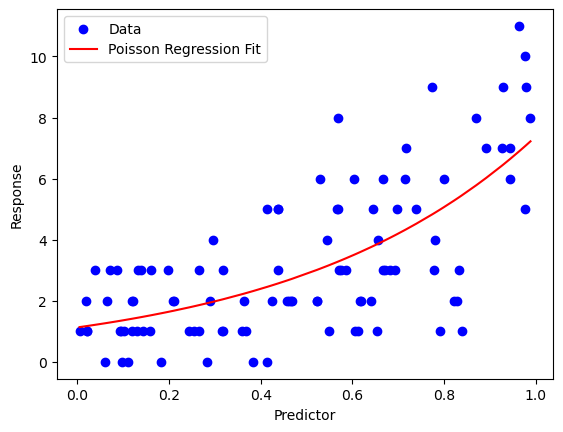

Estimated theta: [0.1222601  1.87670222]


In [81]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic dataset
np.random.seed(0)
m = 100  # number of samples
X = np.random.rand(m, 1)  # one predictor
X=np.sort(X,axis=0)
true_theta = np.array([2.0])  # true parameter
lambda_true = np.exp(X @ true_theta)  # true rate parameter
y = np.random.poisson(lambda_true)  # response variable

# Add a column of ones to X for the intercept term
X = np.hstack([np.ones((m, 1)), X])

# Poisson regression using gradient ascent
def poisson_log_likelihood(theta, X, y):
    lambda_est = np.exp(X @ theta)
    return -np.sum(y * np.log(lambda_est) - lambda_est - np.log(np.arange(1, np.max(y)+1)).sum())

def gradient(theta, X, y):
    lambda_est = np.exp(X @ theta)
    return ( X.T @ (y - lambda_est))

def train_poisson_regression(X, y, learning_rate=0.001, epochs=1000):

    theta = np.zeros(X.shape[1])
    for epoch in range(epochs):
        grad = gradient(theta, X, y)
        theta += learning_rate * grad
        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Log-likelihood: {poisson_log_likelihood(theta, X, y)}')
    return theta

# Train the model
theta_est = train_poisson_regression(X, y)

# Plot the results
plt.scatter(X[:, 1], y, color='blue', label='Data')
plt.plot(X[:, 1], np.exp(X @ theta_est), color='red', label='Poisson Regression Fit')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.legend()
plt.show()

print("Estimated theta:", theta_est)
